In [17]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Deflategate ##

In [18]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [19]:
#football= football.with_column('Combined', football.column('Blakeman')+football.column('Prioleau')/2)
#football.show()

football = football.with_column('Combined', (football.column(1)+football.column(2))/2).drop(1, 2)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [20]:
patriots = football.where('Team', are.containing('Patriots'))
patriots = patriots.with_column('Drop', 12.5-patriots.column('Combined'))
patriots.show()


Team,Combined,Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


In [21]:
colts = football.where('Team', are.containing('Colts'))
colts = colts.with_column('Drop', 13.0 - colts.column('Combined'))
colts.show()

Team,Combined,Drop
Colts,12.525,0.475
Colts,12.525,0.475
Colts,12.725,0.275
Colts,12.35,0.65


In [22]:
patriots_mean = patriots.column('Drop').mean()
colts_mean= colts.column('Drop').mean()
observed_stats = patriots_mean-colts_mean
observed_stats

0.733522727272728

In [23]:
drops= Table().with_column('Drop', np.append(patriots.column('Drop'),colts.column('Drop')))

drops.show()

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [24]:
#Simulating one replication. Notice no sample, default is the same as the original data
#We are shuffling the data
drops.sample(with_replacement=False).show()

Drop
0.85
0.425
0.65
0.725
1.65
0.275
1.475
0.475
1.35
1.175


In [25]:
#Now take the mean of the first 11 and subtract from last 4
shuffle = drops.sample(with_replacement = False)
patriots_new_mean = shuffle.take(np.arange(11)).column('Drop').mean()
colts_new_mean = shuffle.take(np.arange(11,15)).column('Drop').mean()
simulated_diff = patriots_new_mean - colts_new_mean
simulated_diff

0.06022727272727235

In [31]:
#Now lets just to this again and again

stats = make_array()
repetitions = 10000

for i in np.arange(repetitions):
    shuffle = drops.sample(with_replacement = False)
    patriots_new_mean = shuffle.take(np.arange(11)).column('Drop').mean()
    colts_new_mean = shuffle.take(np.arange(11,15)).column('Drop').mean()
    simulated_diff = patriots_new_mean - colts_new_mean
    stats = np.append(stats, simulated_diff)
    


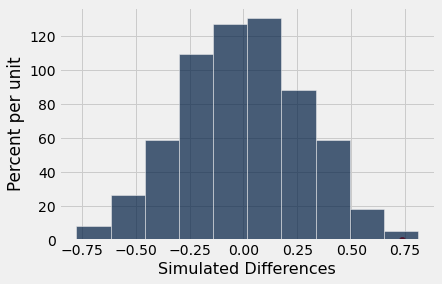

In [32]:
Results = Table().with_column('Simulated Differences', stats)
Results.hist()
plots.scatter(observed_stats, 0, color = 'red', s = 40)

This is called a permutation test since we have no assumptions while running this test. 
The above histogram gives the empirical distribution of the test statistics. 
Since our observed test statistic value lies in the tail of the distribution. we will reject null hypothesis.

In [28]:
#calculate our p value

In [29]:
empirical_p = np.count_nonzero(stats>observed_stats)/repetitions
print('Empirical p-value', empirical_p)

Empirical p-value 0.0024
